In [5]:
import json
import random
#import balance
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import grammar as g
import numpy as np

In [46]:
def pickleDump(var, destination):
    f = open(destination,"wb")
    pickle.dump(var,f)
    f.close() 
    
    
def pickleLoad(path):
    file = open(path, 'rb')
    info = pickle.load(file)
    file.close()
    return info

def loadMetrics(title, d_path, group, balanced):
    if type(balanced) == bool:
        print("balanced should be text")
        return
    path = '../../exports/%s/metrics/%s/%s/%s.pkl' % (d_path, balanced, group, title)
    
    return pickleLoad(path)



In [8]:

IDX = pickleLoad('../../data/IDX.pkl')
PP = pickleLoad('../../data/pres_part.pkl')
PRES = pickleLoad('../../data/present.pkl')
ENG = pickleLoad('../../data/eng.pkl')
PAST = pickleLoad('../../data/past.pkl')

In [10]:
train_stsgs = pickleLoad('../../data/stsgs/train_stsgs.pkl')
test_stsgs = pickleLoad('../../data/stsgs/test_stsgs.pkl')

In [11]:

with open('../../data/template_ids.txt') as json_file:
    templ_ids_dict = json.load(json_file)
    
templ_ids = []

for i in templ_ids_dict:
    templ_ids.append(i)

In [12]:

with open('../../data/templ2global.txt') as json_file:
    templ2global = json.load(json_file)

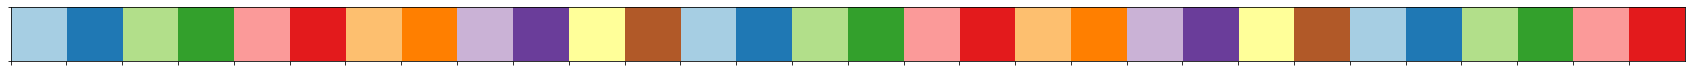

In [13]:

palettes = ['BuPu', 'PuOr_r', 'RdBu', 'RdBu_r', 'RdGy_r', 'Set3', 'afmhot', 'afmhot_r', 'seismic', 'seismic_r', 'tab20c', 'twilight_shifted', 'vlag_r']

palettes_v2 = ['BrBG', 'BrBG_r', 'PuOr', 'PuOr_r', 'twilight_shifted', 'twilight_shifted_r']
#for p in palettes:
#    prin
col = 'Paired'#'Dark2_r'#'vlag' # want it to be more distinct for all of them
colors = sns.color_palette(col, 30)
sns.palplot(sns.color_palette(col, 30))

# Load data

In [18]:
d_path = 'dataset'

In [23]:
filenames = ['answers', 'structurals', 'semantics', 'steps']
path_start = "../../exports/%s/statistics" % d_path

In [24]:
stats_section = "all/train"
answers_tr_a = pickleLoad('%s/%s/%s.pkl' % (path_start, stats_section, filenames[0]))
structurals_tr_a = pickleLoad('%s/%s/%s.pkl'  % (path_start,  stats_section, filenames[1]))
semantics_tr_a = pickleLoad('%s/%s/%s.pkl' % (path_start,  stats_section, filenames[2]))
steps_tr_a = pickleLoad('%s/%s/%s.pkl'  % (path_start,  stats_section, filenames[3]))


In [25]:
stats_section = 'balanced/train'
answers_tr_b = pickleLoad('%s/%s/%s.pkl' % (path_start, stats_section, filenames[0]))
structurals_tr_b = pickleLoad('%s/%s/%s.pkl'  % (path_start,  stats_section, filenames[1]))
semantics_tr_b = pickleLoad('%s/%s/%s.pkl' % (path_start,  stats_section, filenames[2]))
steps_tr_b = pickleLoad('%s/%s/%s.pkl'  % (path_start,  stats_section, filenames[3]))


In [26]:
stats_section = 'all/test'
answers_te_a = pickleLoad('%s/%s/%s.pkl' % (path_start, stats_section, filenames[0]))
structurals_te_a = pickleLoad('%s/%s/%s.pkl'  % (path_start,  stats_section, filenames[1]))
semantics_te_a = pickleLoad('%s/%s/%s.pkl' % (path_start,  stats_section, filenames[2]))
steps_te_a = pickleLoad('%s/%s/%s.pkl'  % (path_start,  stats_section, filenames[3]))


In [27]:
stats_section = 'balanced/test'
answers_te_b = pickleLoad('%s/%s/%s.pkl' % (path_start, stats_section, filenames[0]))
structurals_te_b = pickleLoad('%s/%s/%s.pkl'  % (path_start,  stats_section, filenames[1]))
semantics_te_b = pickleLoad('%s/%s/%s.pkl' % (path_start,  stats_section, filenames[2]))
steps_te_b = pickleLoad('%s/%s/%s.pkl'  % (path_start,  stats_section, filenames[3]))


In [28]:
answers = [answers_tr_a, answers_tr_b, answers_te_a, answers_te_b]
structurals = [structurals_tr_a, structurals_tr_b, structurals_te_a, structurals_te_b]
semantics = [semantics_tr_a, semantics_tr_b, semantics_te_a, semantics_te_b]
steps = [steps_tr_a, steps_tr_b, steps_te_a, steps_te_b]


In [29]:
struct_bal = [structurals_tr_b, structurals_te_b]
sem_bal = [semantics_tr_b, semantics_te_b]
struct_all = [structurals_tr_a, structurals_te_a]
sem_all = [semantics_tr_a, semantics_te_a]
#struct_tb = [structurals_tr_tb, structurals_te_tb]
#sem_tb = [semantics_tr_tb, semantics_te_tb]

In [30]:
illegal_comp_title = 'illegal_comp'
same_direct_title = 'same_direct'
steps_title = 'steps'
ans_type_title = 'ans_type'
global_title = 'global_vars'
lengths_title = 'lengths'
templ_title = 'templates'

In [47]:
d_path = 'dataset'

balanced = 'balanced'

global_te_b = loadMetrics(global_title, d_path, 'test', balanced)
global_tr_b = loadMetrics(global_title, d_path, 'train', balanced)
#global_te_a = loadMetrics(global_title, d_path, 'test', balanced)
#global_tr_a = loadMetrics(global_title, d_path, 'train', balanced)
#globs = [global_tr_a, global_tr_b, global_te_a, global_te_b]
globs_bal = [global_tr_b, global_te_b]

# categories

In [37]:
# pie plot

def percfunc(x, tot):
    perc = round(x / tot * 100, 1)
    s = str(perc) + '%'

    return s



def show_values_on_bars(tot, sz, axs, h_v="v", space=0.4, percs=[]):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                #_y = p.get_y() + p.get_height()
                _y =  p.get_y() + p.get_height() *  1/2
                value = str(round(p.get_width() / tot * 100, 1)) + '%'
                #print('p', p)
                #print('value', value)
                ax.text(_x, _y, value, ha="left", va="center",fontsize=sz*3)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

def perc(num, denom):
    if denom == 0:
        return 'denom 0'
    return round(num / denom  * 100, 2)

    

def barPlotVisual(x, lab, title="FakeTitle", cmap="vlag", color_idx=None, round_dec=False):
    cmap = plt.get_cmap(cmap)
    # "tab20c
    
    #c = cmap(np.array([0, 20, 40]))
    init = 0
    step = 2
    if color_idx == None:
        c = cmap(np.array([i for i in range(init, step* len(x) +init , step)]))
    else:
        c = cmap(np.array(color_idx))
        
        

        
    data_input = zip(x, lab)

    data = pd.DataFrame(data=data_input, columns=["num", "type"])

    sns.set_style('whitegrid')
    #print("x", x)
    #print("lab", lab)
    
    
    sz = 40
    sz_y = 5
    
   
    plt.subplots(figsize=(sz, sz_y * len(x)))
    #print("FIX SIZE", plt.subplots.figsize)
    
    #ax2 = sns.barplot(x, height=.8, lab, palette=c)#'Paired')
    ax2 = sns.barplot(x='num', y='type', data=data, palette=c)#, kind='bar', height=10)#, palette=c, height=0.8) 
    #ax2 = sns.barplot(x='num', y='type', data=data)#, palette=c, height=0.8) 
    #ax2 = sns.barplot(x, lab, palette='Paired')
    #return
    ax2.set_xlabel("Questions per category (M)",fontsize=sz*4)
    #ax2.set_ylabel("Accuracy (%)",fontsize=sz*4)
    #ax.set_yticklabels([i * 2 for i in range(0, 110, 10)], size = size * 3)
    #y = 
    #y = [int(i * 100) for i in y]
    
    
    #ax2.set_axis_labels("Questons per Category (M)", "Accuracy (%)")
    
    tot = sum(x)
    y = []
    for i, cat in enumerate(lab):
        #new_lab = '%s %s' % (cat, x[i] / tot)
        y.append(perc(x[i], tot))
    ax2.set_yticklabels(lab, size = sz * 4)
    if not round_dec:
        ax2.set_xticklabels([round(i / 1000000, 1) for i in ax2.get_xticks()], size = sz * 3.5)
    else:
        print('should be roudngn w/o', [round(i / 1000000) for i in ax2.get_xticks()])
        ax2.set_xticklabels([int(round(i / 1000000)) for i in ax2.get_xticks()], size = sz * 3.5)
        
    #print(y)
    show_values_on_bars(tot, sz, ax2, "h", 10000, percs=y)
    
    plt.title(title, fontsize=sz*6)
    sns.despine()
    
    print("saving to '../../figures/dataset/%s-bar.png" % title)
    plt.savefig('../../figures/dataset/%s-bar.png' % title, bbox_inches='tight')
    plt.show()
    plt.clf()
    #ax.set_palette(parula(5)) #colormap(parula(5))
    
    



verify 106486
logic 34152
query 337062
choose 90995
compare 100512

choose 254645
verify 272562
query 849559
compare 138186
logic 85942
saving to '../../figures/dataset/Question structure-bar.png


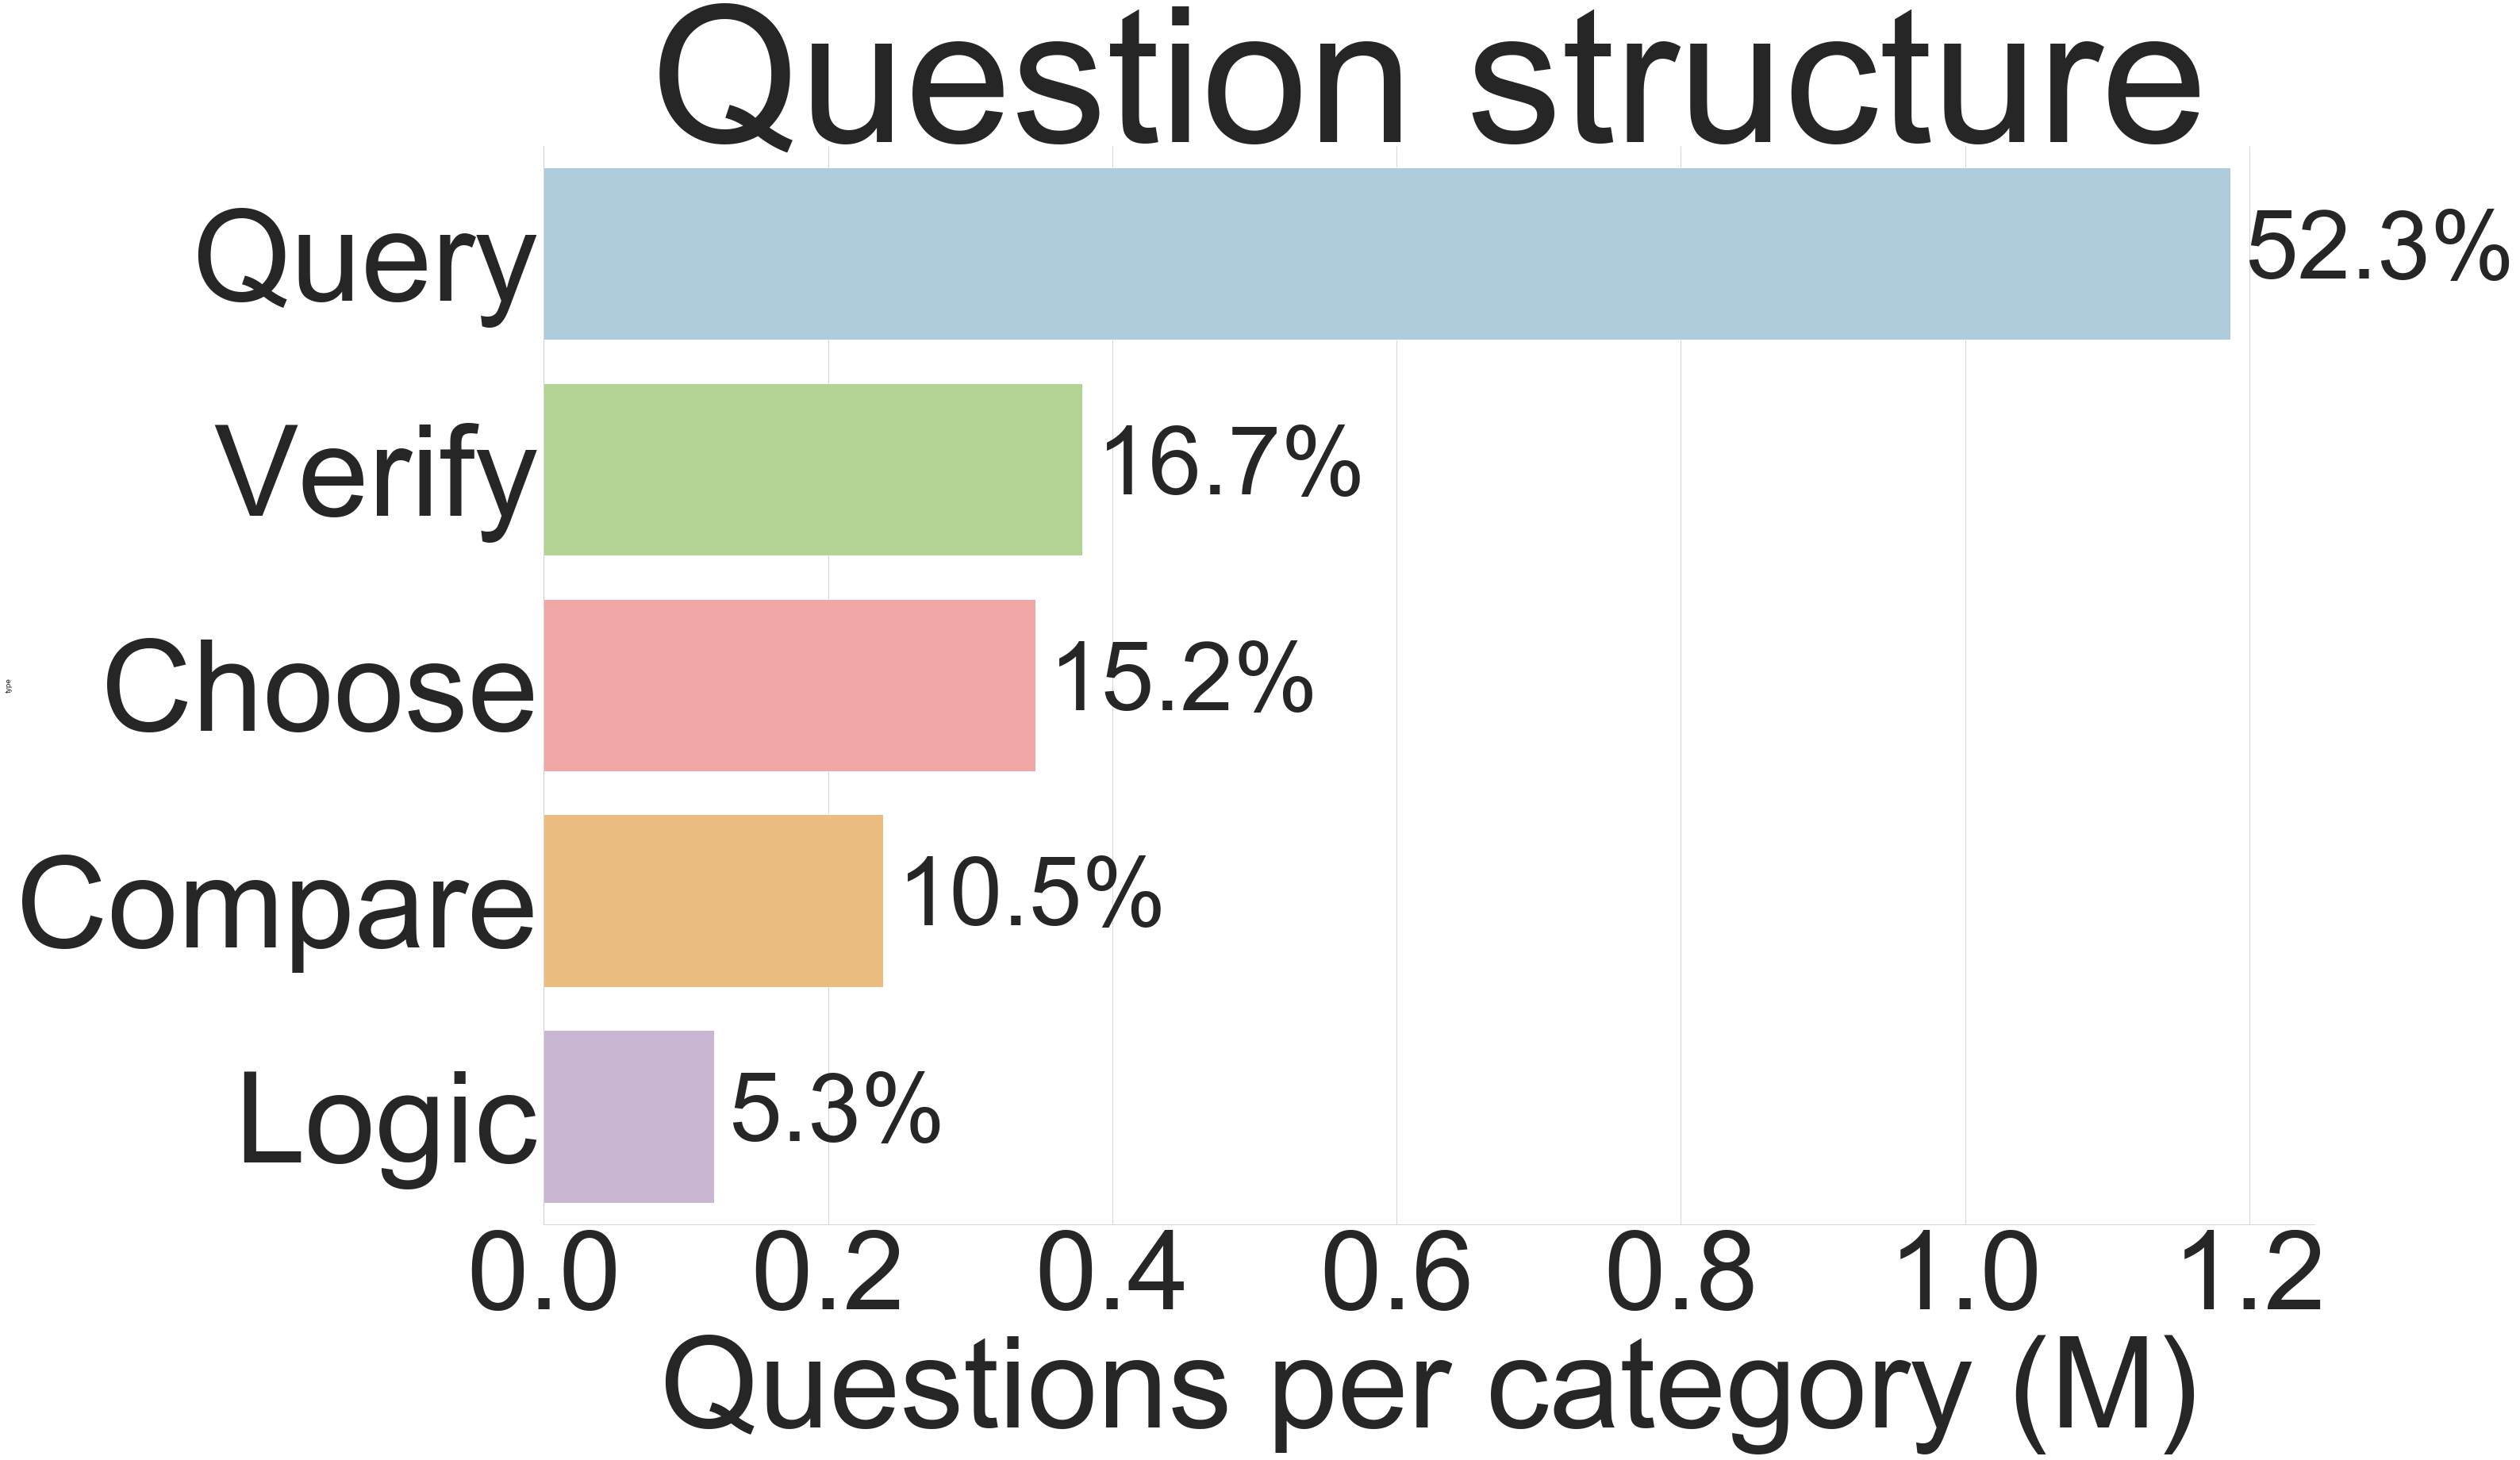

<Figure size 432x288 with 0 Axes>

In [50]:
stats_section = 'balanced/test'
#answers_te_b = pickleLoad('%s/%s/%s.pkl' % (path_start, stats_section, filenames[0]))
#structurals_te_b = pickleLoad('%s/%s/%s.pkl'  % (path_start,  stats_section, filenames[1]))
#semantics_te_b = pickleLoad('%s/%s/%s.pkl' % (path_start,  stats_section, filenames[2]))
#steps_te_b = pickleLoad('%s/%s/%s.pkl'  % (path_start,  stats_section, filenames[3]))

structurals_te_b = pickleLoad('../../exports/dataset/statistics/balanced/test/%s.pkl'  % (filenames[1]))
structurals_tr_b = pickleLoad('../../exports/dataset/statistics/balanced/train/%s.pkl'  % (filenames[1]))

comb = {}
for i in [structurals_te_b, structurals_tr_b]:#struct_tb:
    print()
    
    for j in i:
        print(j, i[j])
        if j not in comb:
            comb[j] = 0
        comb[j] += i[j]
        
sorted_comb = {k: v for k, v in sorted(comb.items(), key=lambda item: item[1], reverse=True)}
x = list(sorted_comb.values())
labels = list(sorted_comb)
labels = [i.capitalize() for i in labels]
        
    

#cmaps = ["vlag", 'YlGnBu', 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r']
cmap = 'Paired'#, 'OrRd_r']
#pieGraphVisual(x, labels, 'Question Structure', cmap, color_idx=[0, 2, 4, 6, 8])
barPlotVisual(x, labels, 'Question structure', cmap, color_idx=[0, 2, 4, 6, 8])
    
    #plt.show()
    #plt.clf()

should be roudngn w/o [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
saving to '../../figures/dataset/Question semantics-bar.png


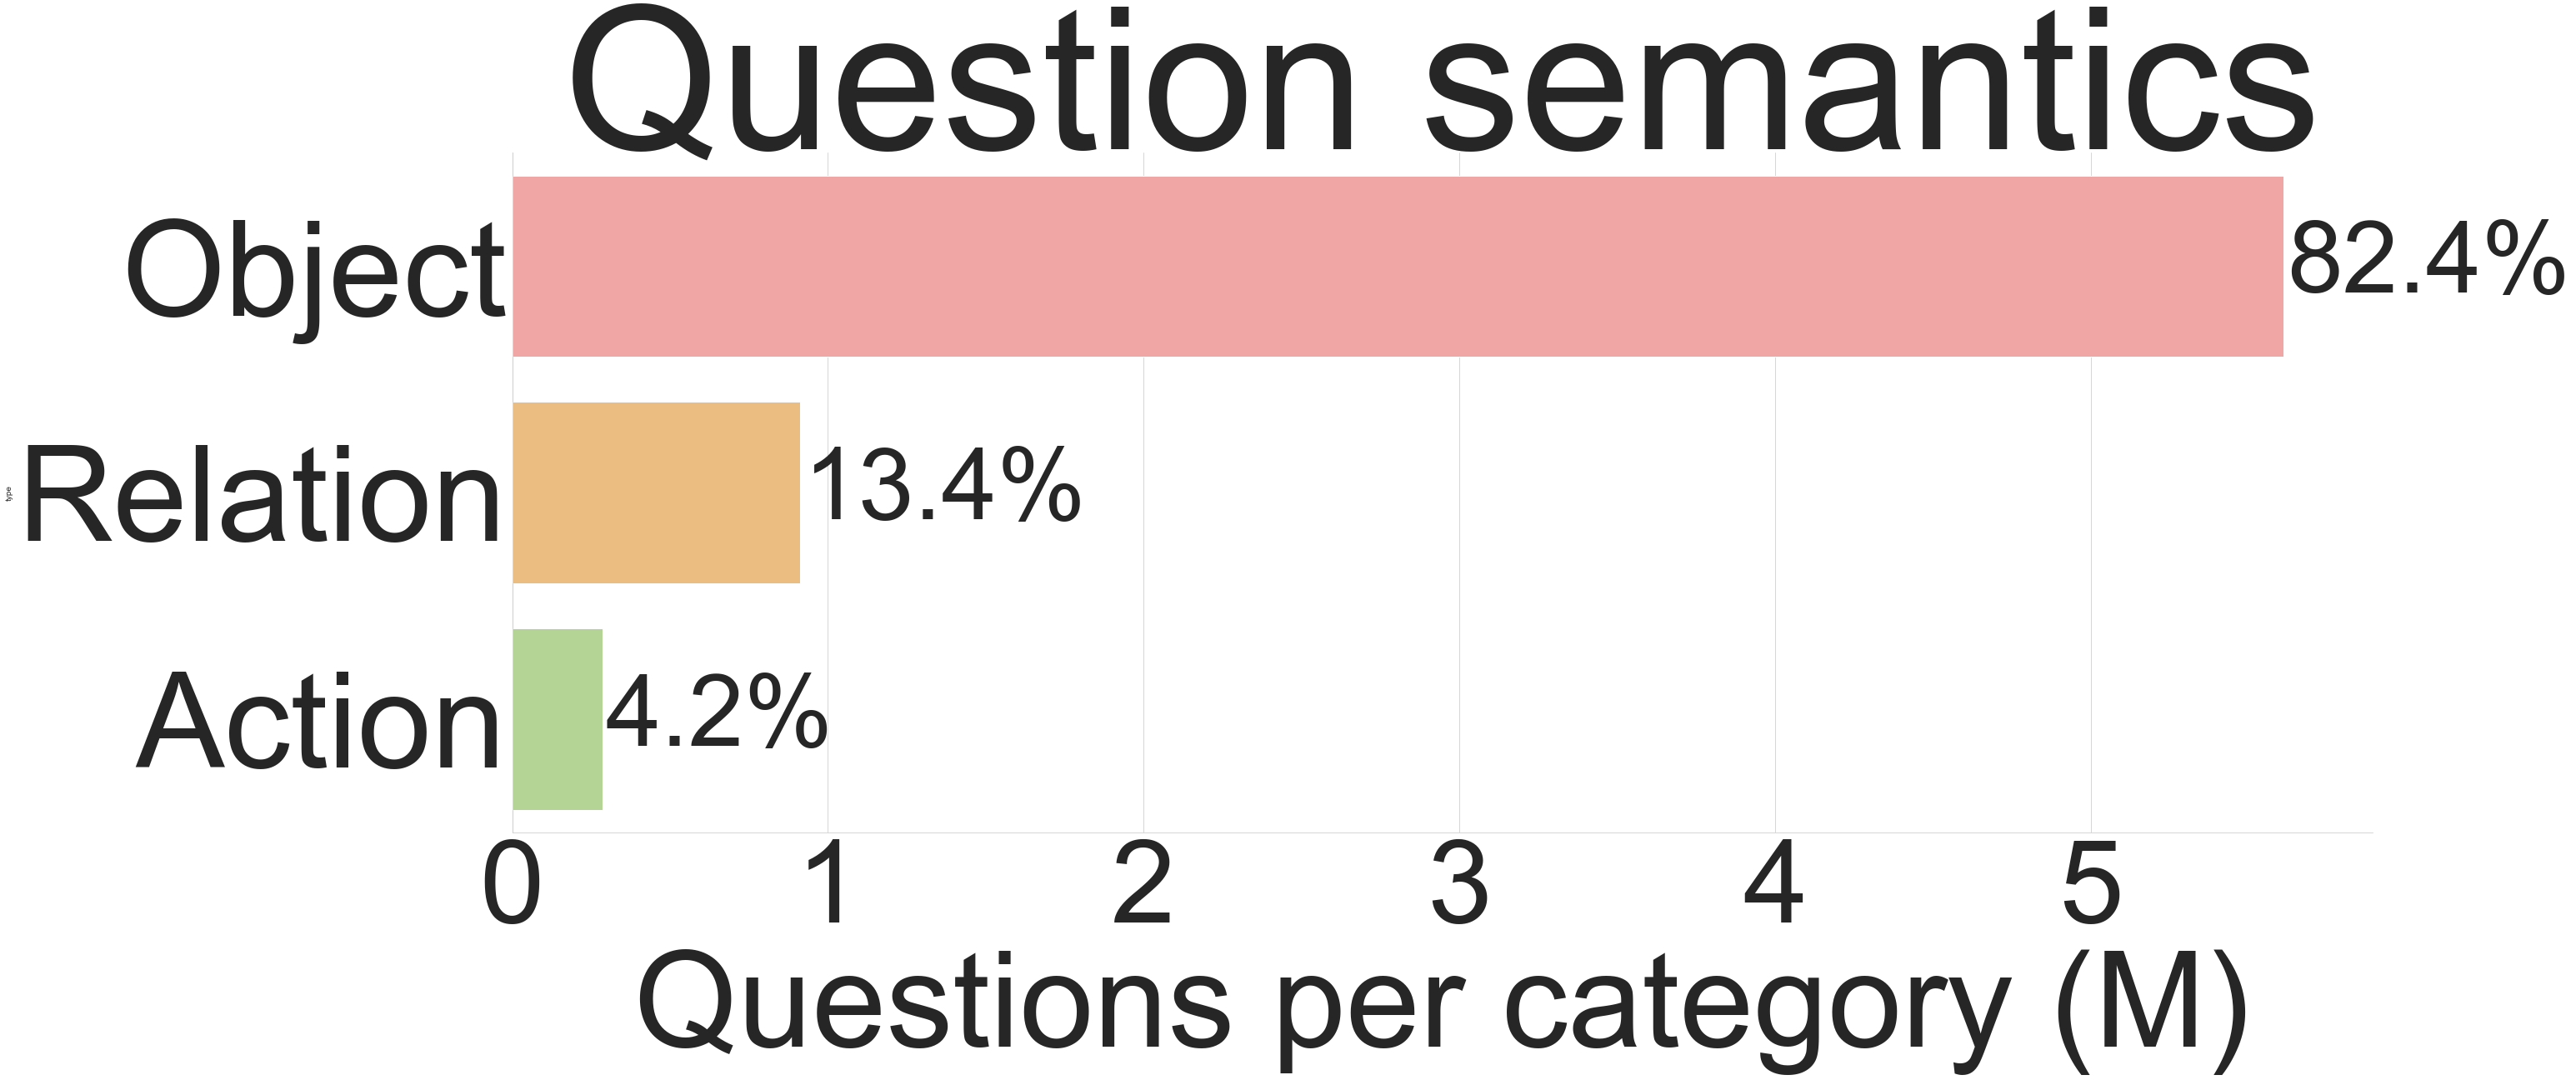

<Figure size 432x288 with 0 Axes>

In [51]:

semantics_te_b = pickleLoad('../../exports/dataset/statistics/balanced/test/%s.pkl'  % (filenames[2]))
semantics_tr_b = pickleLoad('../../exports/dataset/statistics/balanced/train/%s.pkl'  % (filenames[2]))


comb = {}
for i in [semantics_te_b, semantics_tr_b]:
    for j in i:
        #print()

        for j in i:
            #print(j, i[j])
            if j not in comb:
                comb[j] = 0
            comb[j] += i[j]
        
        

#comb['relation'] += comb['objrel']
#del comb['objrel']

        
sorted_comb = {k: v for k, v in sorted(comb.items(), key=lambda item: item[1], reverse=True)}
x = list(sorted_comb.values())
labels = list(sorted_comb)
labels = [i.capitalize() for i in labels]
        

#cmaps = ["vlag", 'YlGnBu', 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r']
cmap = 'Paired'#, 'OrRd_r']
#pieGraphVisual(x, labels, 'Semantic Classes', cmap, [4, 6, 2])
barPlotVisual(x, labels, 'Question semantics', cmap, [4, 6, 2], round_dec=True)
    
    #plt.show()
    
    #plt.clf()


verify 93367881
logic 32618978
query 1559344
choose 3732917
compare 1063120

verify 37649104
logic 19401946
query 679171
choose 2443442
compare 414180
x [2238515, 1477300, 131016985, 6176359, 52020924]
lab ['Query', 'Compare', 'Verify', 'Choose', 'Logic']
should be roudngn w/o [0.0, 20.0, 40.0, 60.0, 80.0, 100.0, 120.0, 140.0]
p Rectangle(xy=(0, -0.4), width=2.23852e+06, height=0.8, angle=0)
value 1.2%
p Rectangle(xy=(0, 0.6), width=1.4773e+06, height=0.8, angle=0)
value 0.8%
p Rectangle(xy=(0, 1.6), width=1.31017e+08, height=0.8, angle=0)
value 67.9%
p Rectangle(xy=(0, 2.6), width=6.17636e+06, height=0.8, angle=0)
value 3.2%
p Rectangle(xy=(0, 3.6), width=5.20209e+07, height=0.8, angle=0)
value 27.0%
saving to '../figures/dataset/Unbalanced structures-bar.png


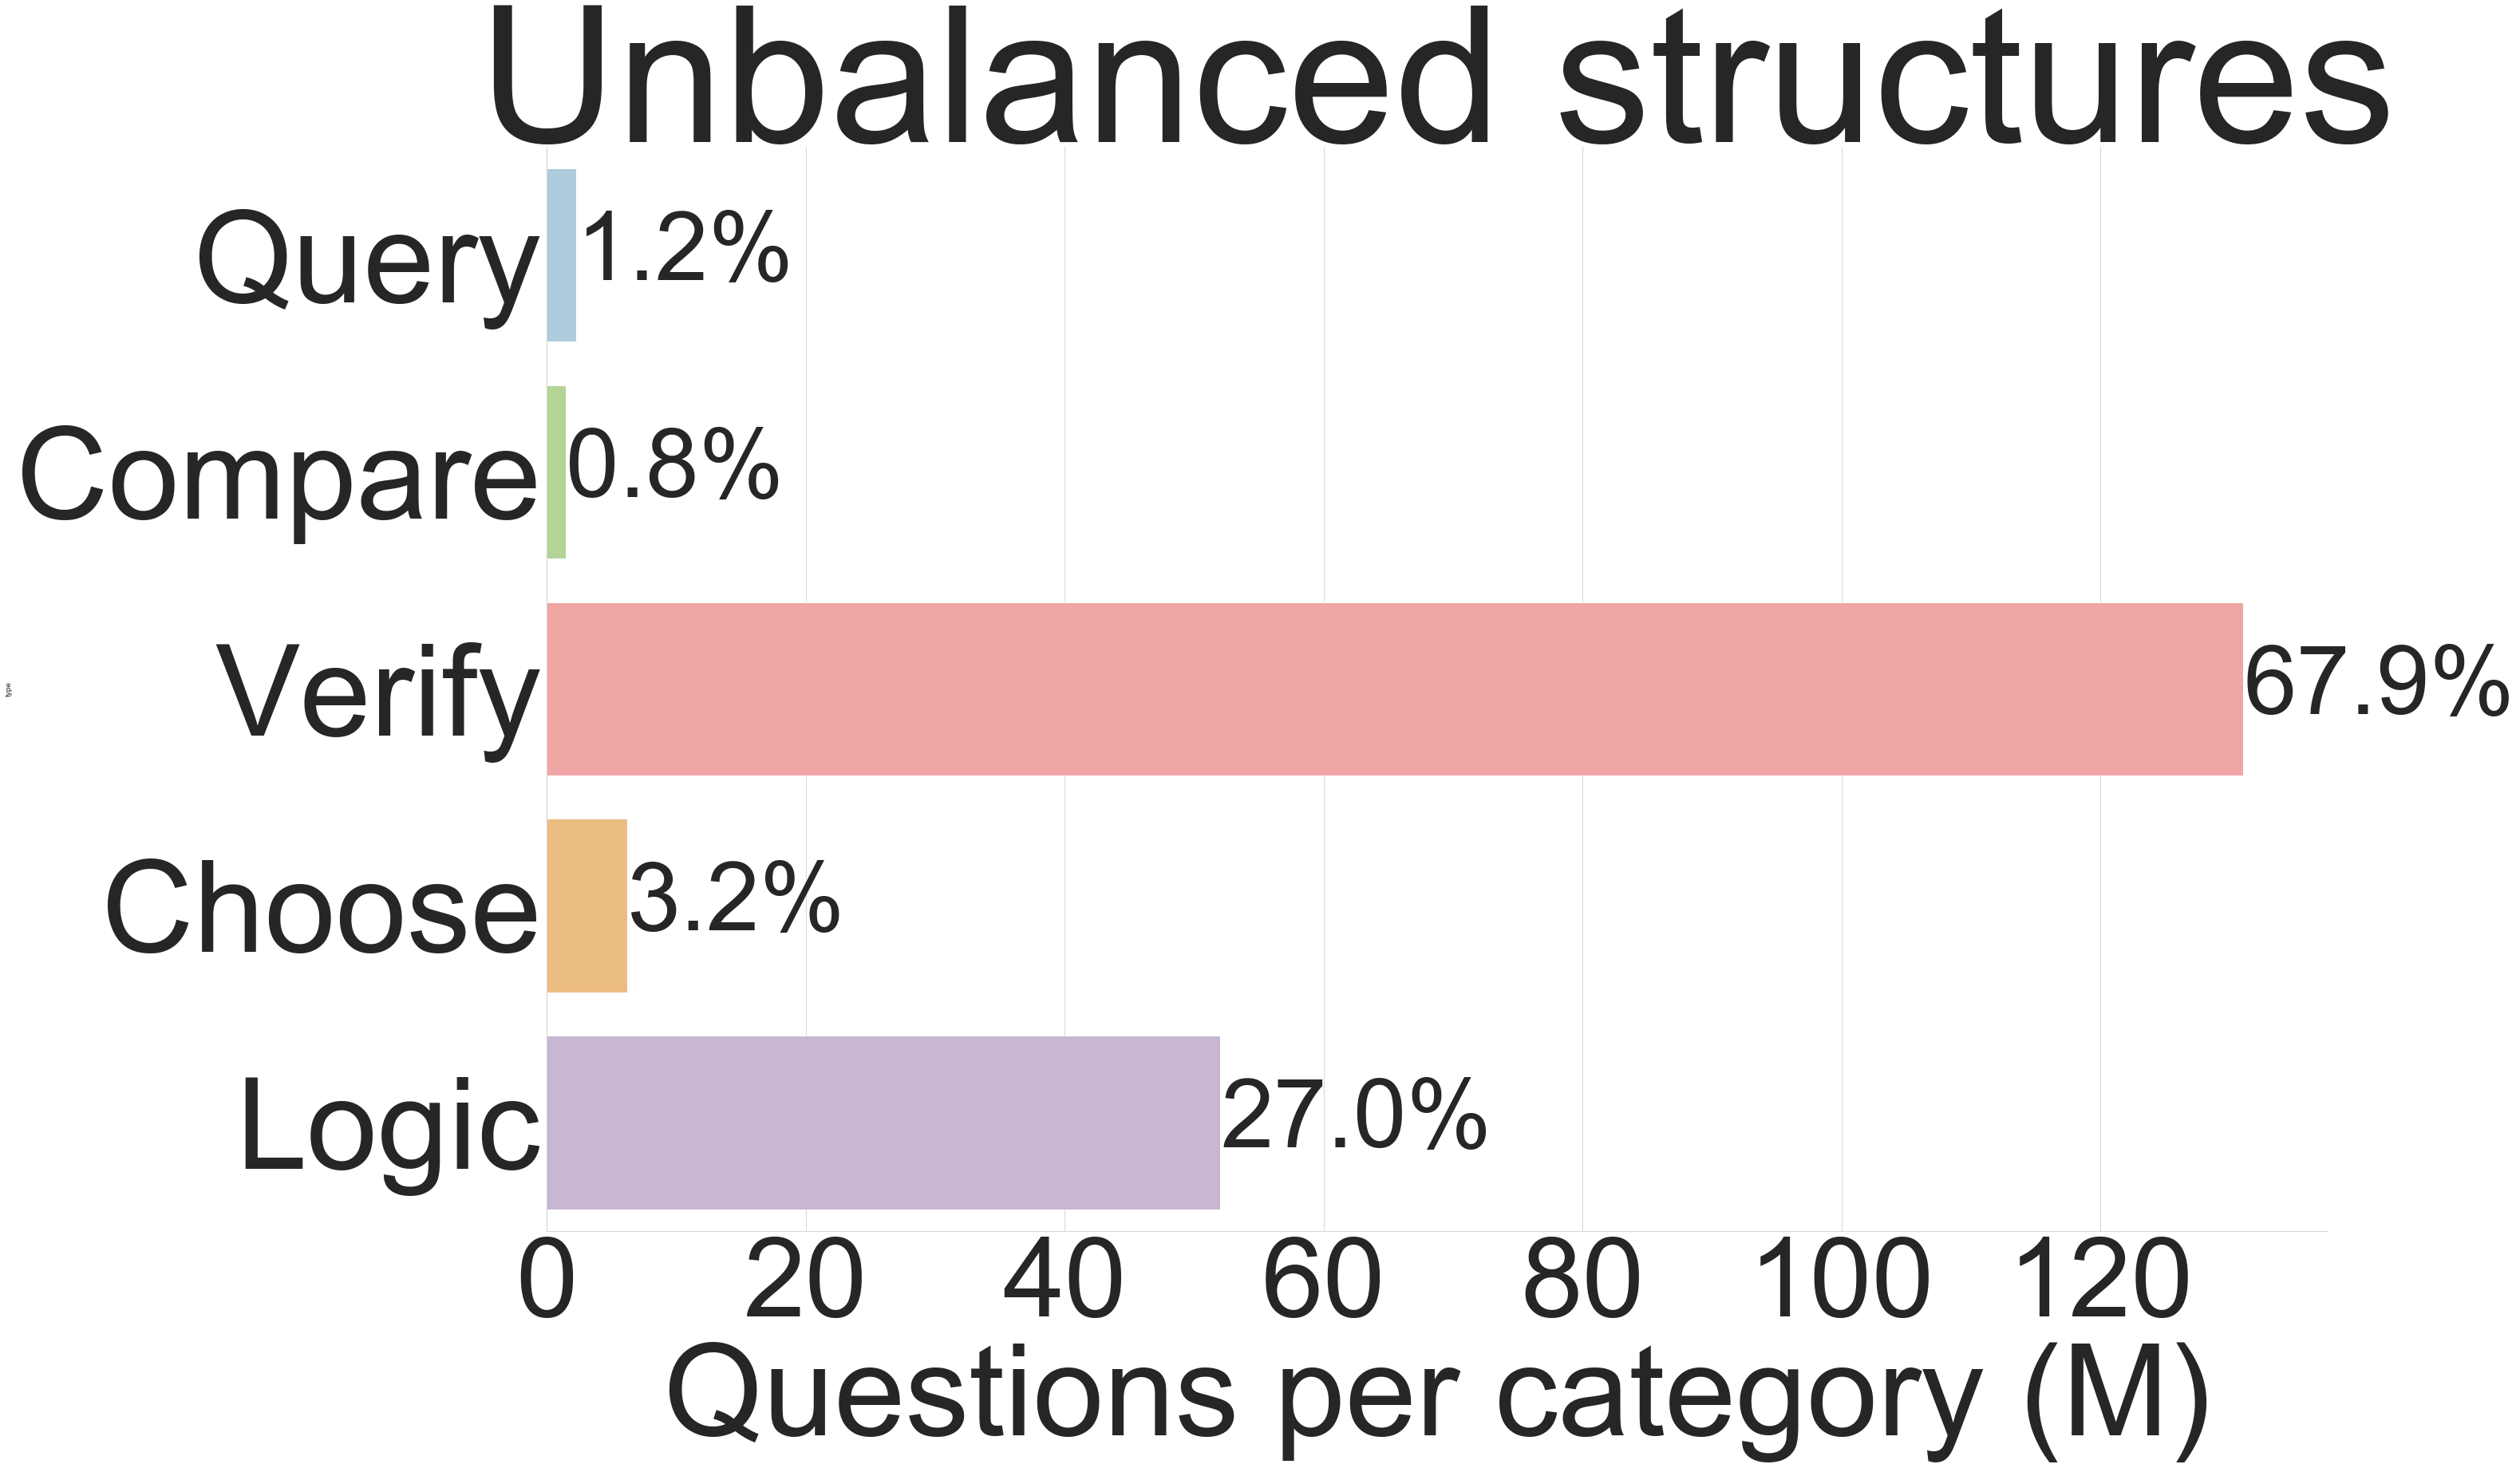

<Figure size 432x288 with 0 Axes>

In [63]:
comb = {}
for i in struct_all:
    print()
    
    for j in i:
        print(j, i[j])
        if j not in comb:
            comb[j] = 0
        comb[j] += i[j]

order = ['query', 'compare', 'verify', 'choose', 'logic']
        
    
sorted_comb = {k: v for k, v in sorted(comb.items(), key=lambda item: item[1], reverse=True)}
x = list(sorted_comb.values())
labels = list(sorted_comb)
labels = [i.capitalize() for i in labels]
        

x_ordered = []
labels_ordered = []
for i in order:
    x_ordered.append(comb[i])
    labels_ordered.append(i.capitalize())
    

#cmaps = ["vlag", 'YlGnBu', 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r']
cmap = 'Paired'#, 'OrRd_r']
#pieGraphVisual(x, labels, 'Structural Categories All', cmap, color_idx = [8, 4, 2, 6, 0])
#barPlotVisual(x, labels, 'Structural Categories All', cmap, color_idx = [8, 4, 2, 6, 0])
barPlotVisual(x_ordered, labels_ordered, 'Unbalanced structures', cmap, color_idx = [0, 2, 4, 6, 8], round_dec=True)
    
    #plt.show()
    #plt.clf()


verify 93526967
logic 97444614
query 4647918
choose 8889993
compare 15115487

verify 43462054
logic 61222220
query 2399988
choose 6486687
compare 10238496
should be roudngn w/o [0.0, 20.0, 40.0, 60.0, 80.0, 100.0, 120.0, 140.0, 160.0, 180.0]
saving to '../../figures/dataset/Unbalanced structures-bar.png


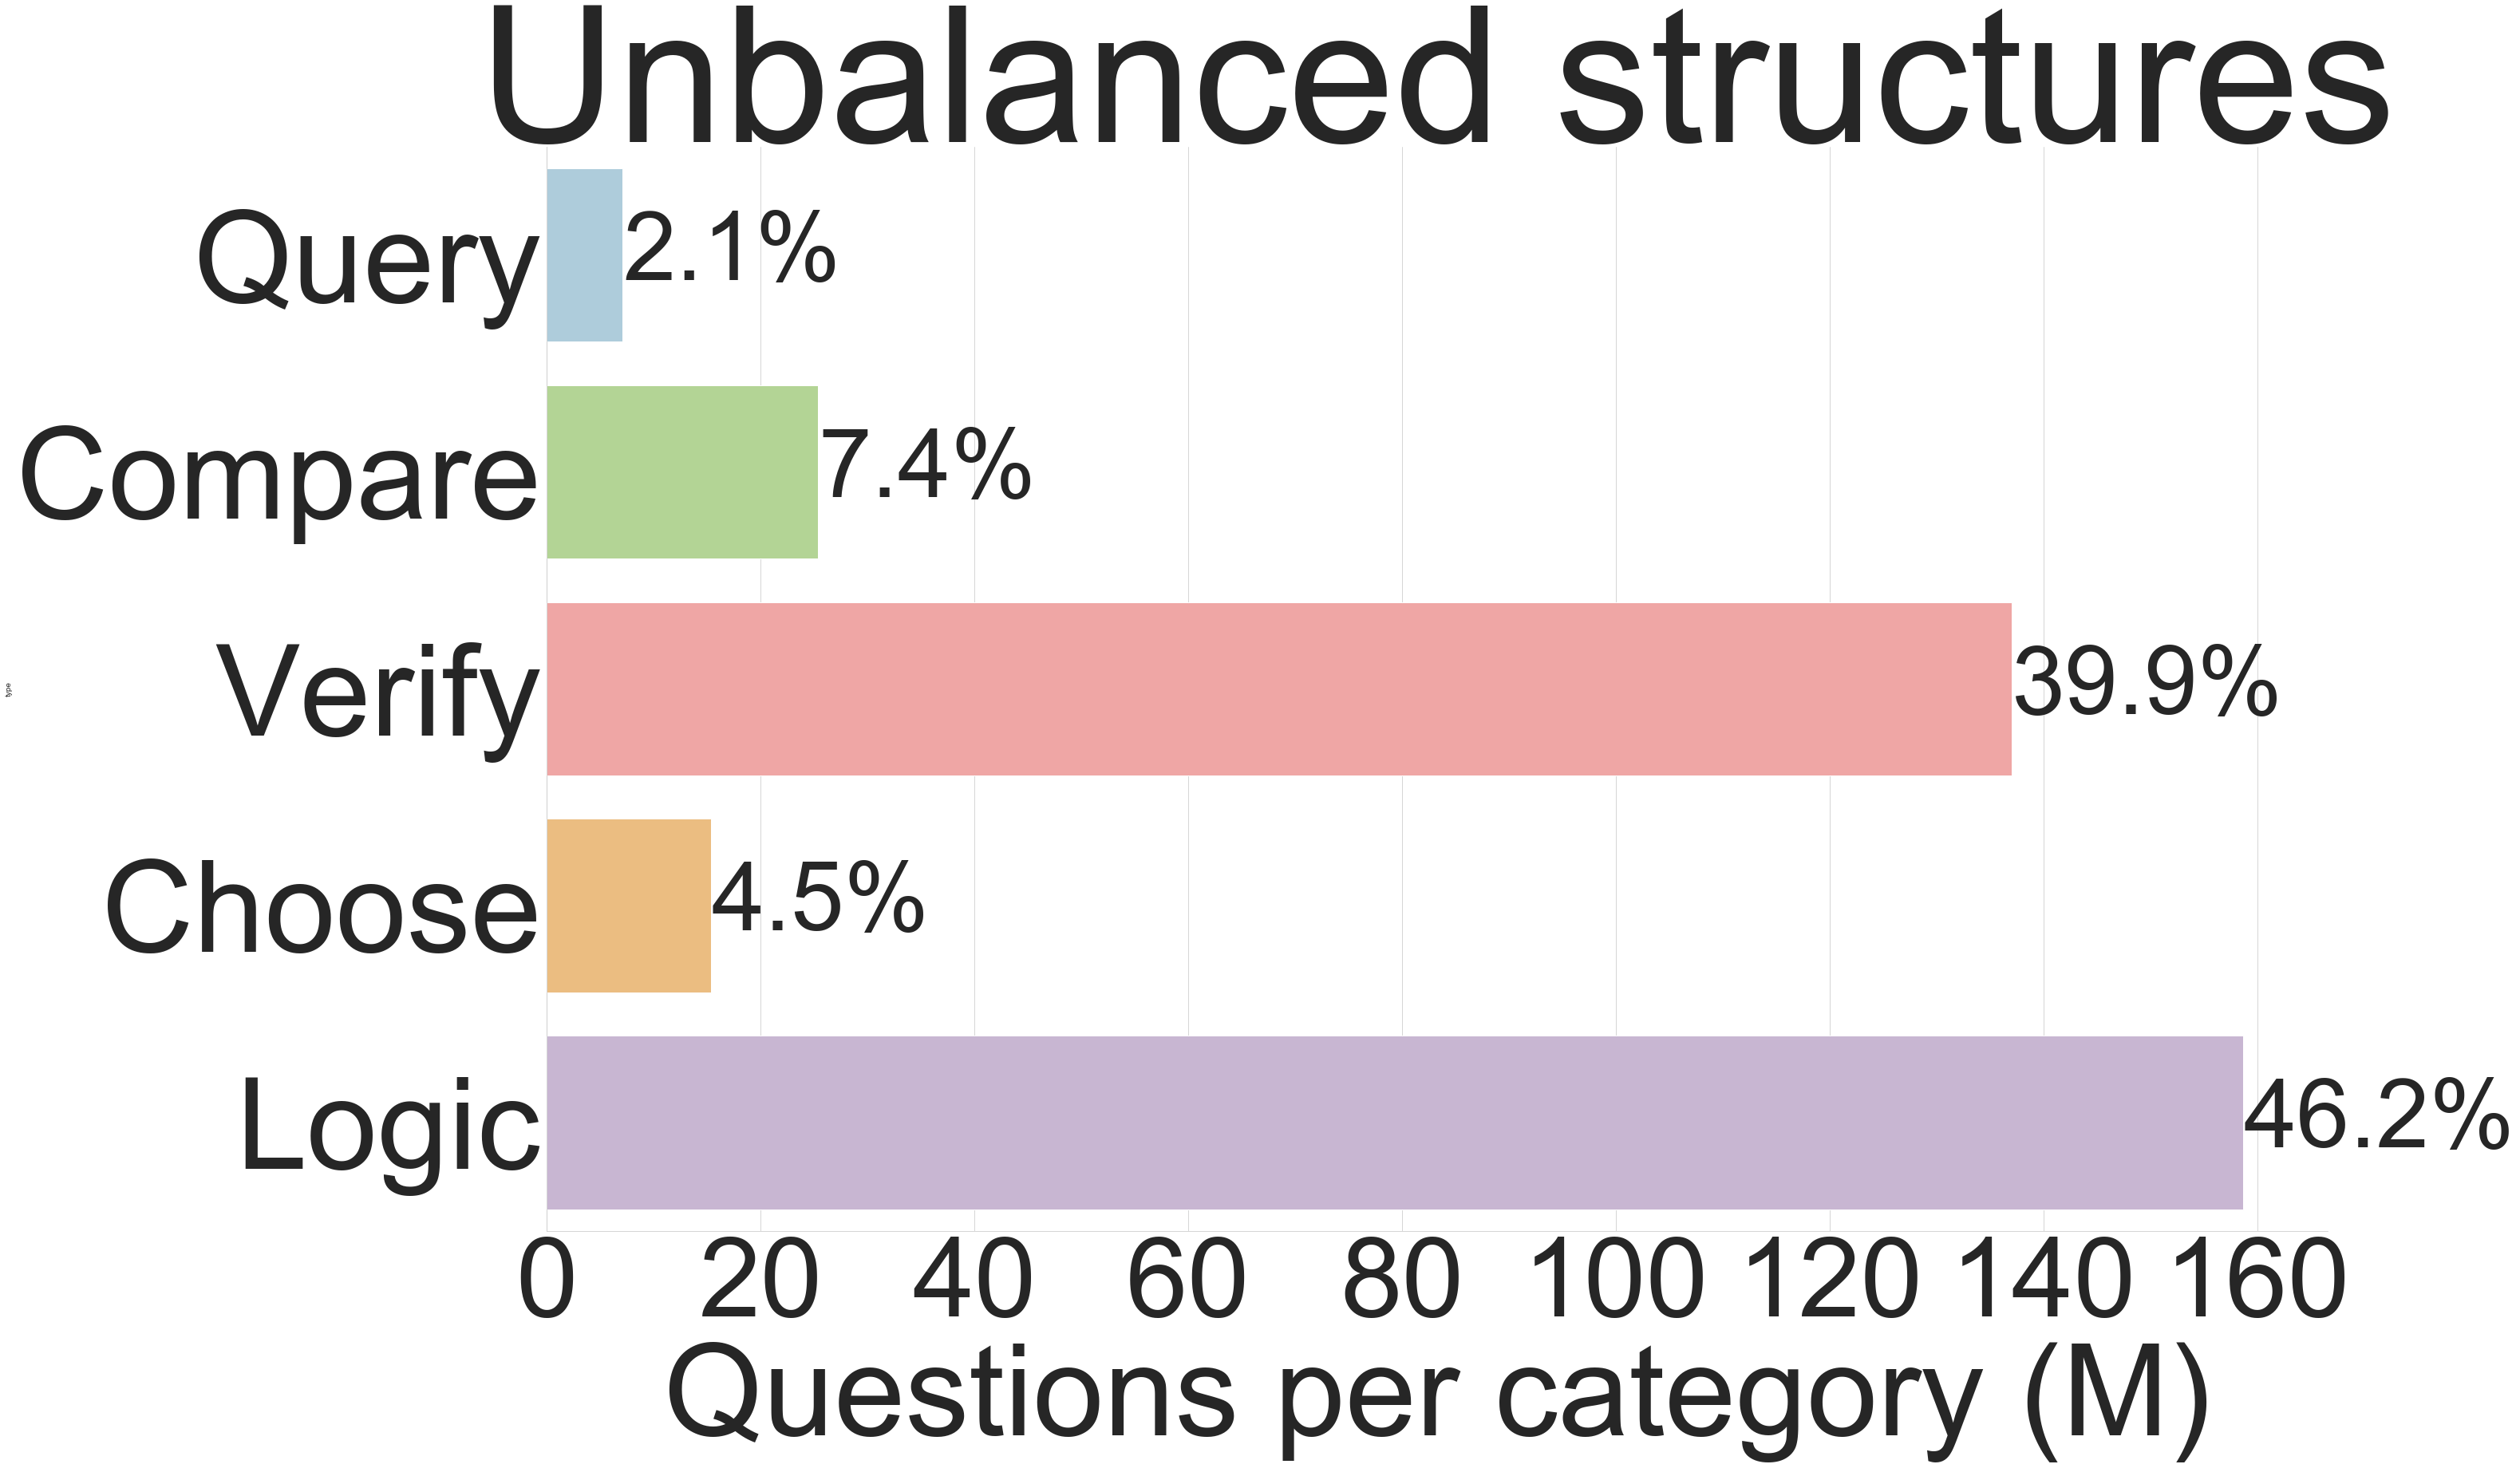

<Figure size 432x288 with 0 Axes>

In [42]:
comb = {}
for i in struct_all:
    print()
    
    for j in i:
        print(j, i[j])
        if j not in comb:
            comb[j] = 0
        comb[j] += i[j]

order = ['query', 'compare', 'verify', 'choose', 'logic']
        
    
sorted_comb = {k: v for k, v in sorted(comb.items(), key=lambda item: item[1], reverse=True)}
x = list(sorted_comb.values())
labels = list(sorted_comb)
labels = [i.capitalize() for i in labels]
        

x_ordered = []
labels_ordered = []
for i in order:
    x_ordered.append(comb[i])
    labels_ordered.append(i.capitalize())
    

#cmaps = ["vlag", 'YlGnBu', 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r']
cmap = 'Paired'#, 'OrRd_r']
#pieGraphVisual(x, labels, 'Structural Categories All', cmap, color_idx = [8, 4, 2, 6, 0])
#barPlotVisual(x, labels, 'Structural Categories All', cmap, color_idx = [8, 4, 2, 6, 0])
barPlotVisual(x_ordered, labels_ordered, 'Unbalanced structures', cmap, color_idx = [0, 2, 4, 6, 8], round_dec=True)
    
    #plt.show()
    #plt.clf()

obj-rel 1199336
obj-act 65952
rel-act 15169
duration-comparison 35158
superlative 188512
exists 216405
count 0
action-recognition 8810
sequencing 94825
obj-rel 521508
obj-act 44836
rel-act 21018
duration-comparison 13255
superlative 103090
exists 97362
count 0
action-recognition 1087
sequencing 87959
saving to '../../figures/dataset/Question reasoning type-bar.png


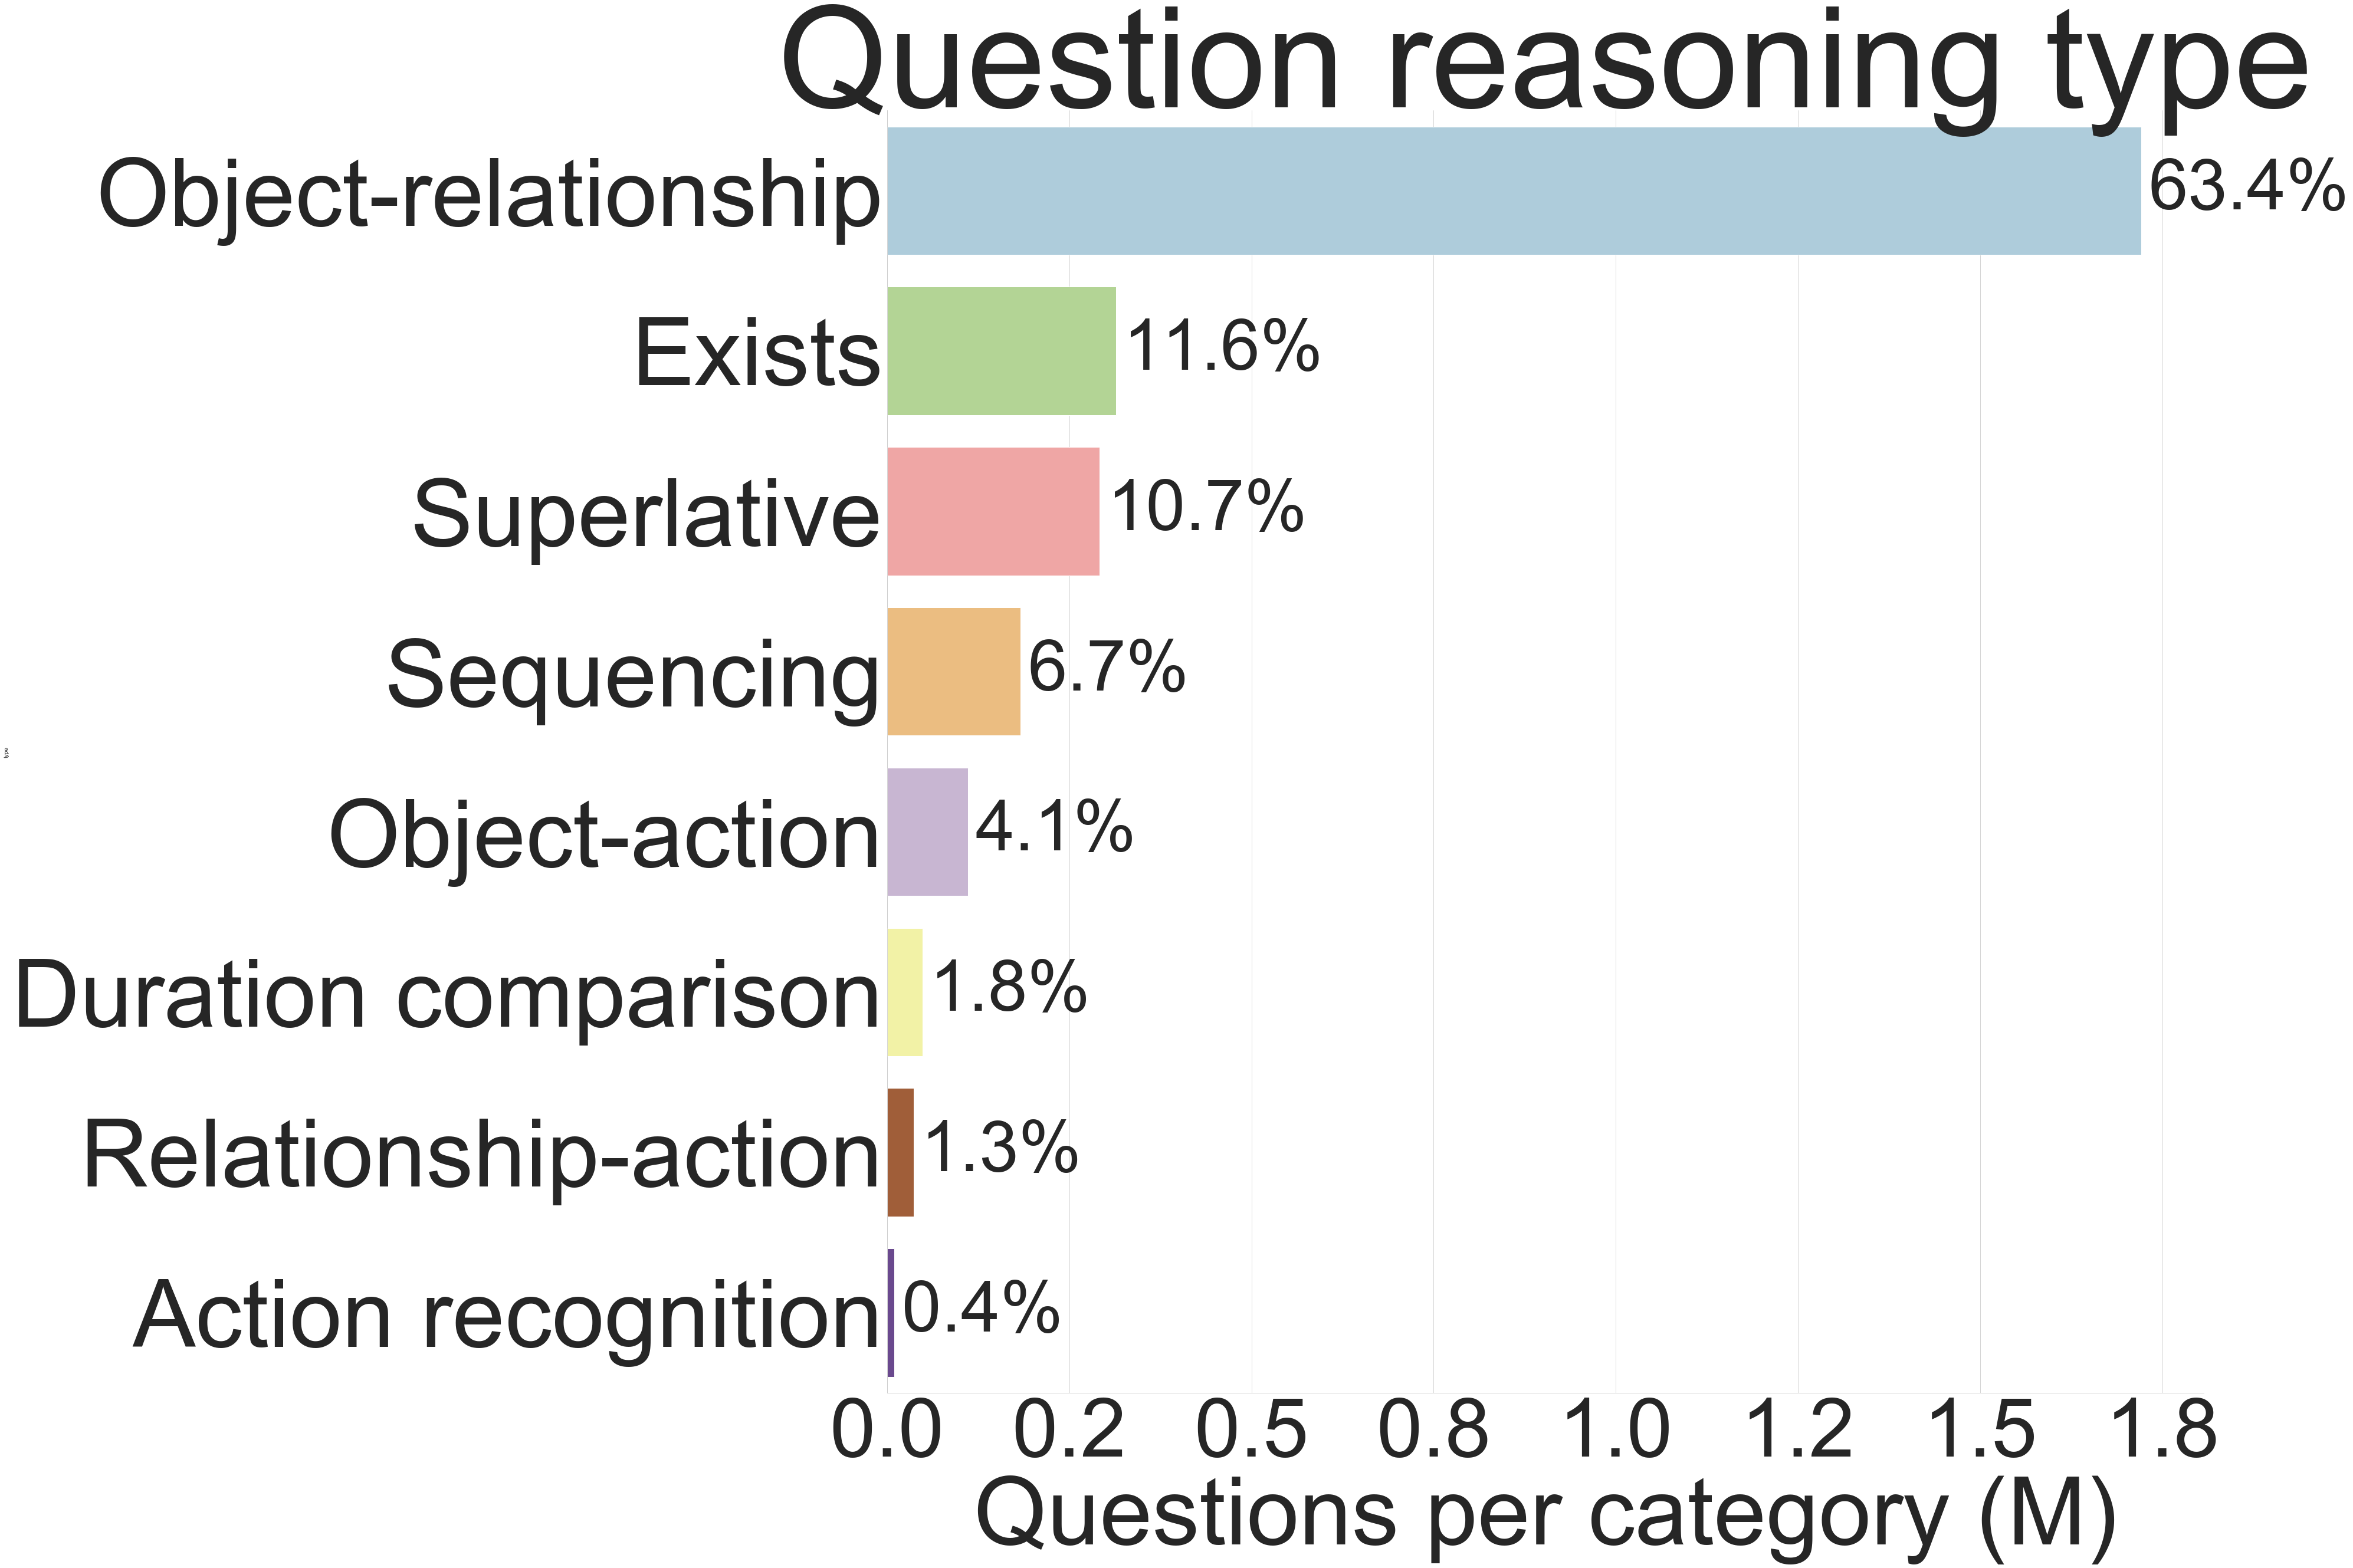

<Figure size 432x288 with 0 Axes>

In [52]:
comb = {}
for i in globs_bal:
    #print()
    
    for j in i:
        print(j, i[j])
        if j not in comb:
            comb[j] = 0
        comb[j] += i[j]
        
#comb['First and Last'] = comb['first'] + comb['last']
##del comb['first']
#del comb['last']

comb['Object-Relationship'] = comb['obj-rel']
del comb['obj-rel']
        
comb['Object-Action'] = comb['obj-act']
del comb['obj-act']

comb['Relationship-Action'] = comb['rel-act']
del comb['rel-act']

comb['Duration Comparison'] = comb['duration-comparison']
del comb['duration-comparison']

comb['Action Recognition'] = comb['action-recognition']
del comb['action-recognition']

del comb['count']

sorted_comb = {k: v for k, v in sorted(comb.items(), key=lambda item: item[1], reverse=True)}
x = list(sorted_comb.values())
labels = list(sorted_comb)
labels = [i.capitalize() for i in labels]
        


#cmaps = ["vlag", 'YlGnBu', 'Accent', 'Accen/t_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r']
cmap = 'Paired'#, 'OrRd_r']
#pieGraphVisual(x, labels, 'Reasoning Categories', cmap, color_idx=[0, 2, 4, 6, 8, 10, 11, 9, 5])
barPlotVisual(x, labels, 'Question reasoning type', cmap, color_idx=[0, 2, 4, 6, 8, 10, 11, 9, 5])
    
    #plt.show()
    #plt.clf()

obj-rel 1199336
obj-act 65952
rel-act 15169
duration-comparison 35158
superlative 188512
exists 216405
count 0
action-recognition 8810
sequencing 94825
obj-rel 521508
obj-act 44836
rel-act 21018
duration-comparison 13255
superlative 103090
exists 97362
count 0
action-recognition 1087
sequencing 87959
saving to '../../figures/dataset/Reasoning Categories-bar.png


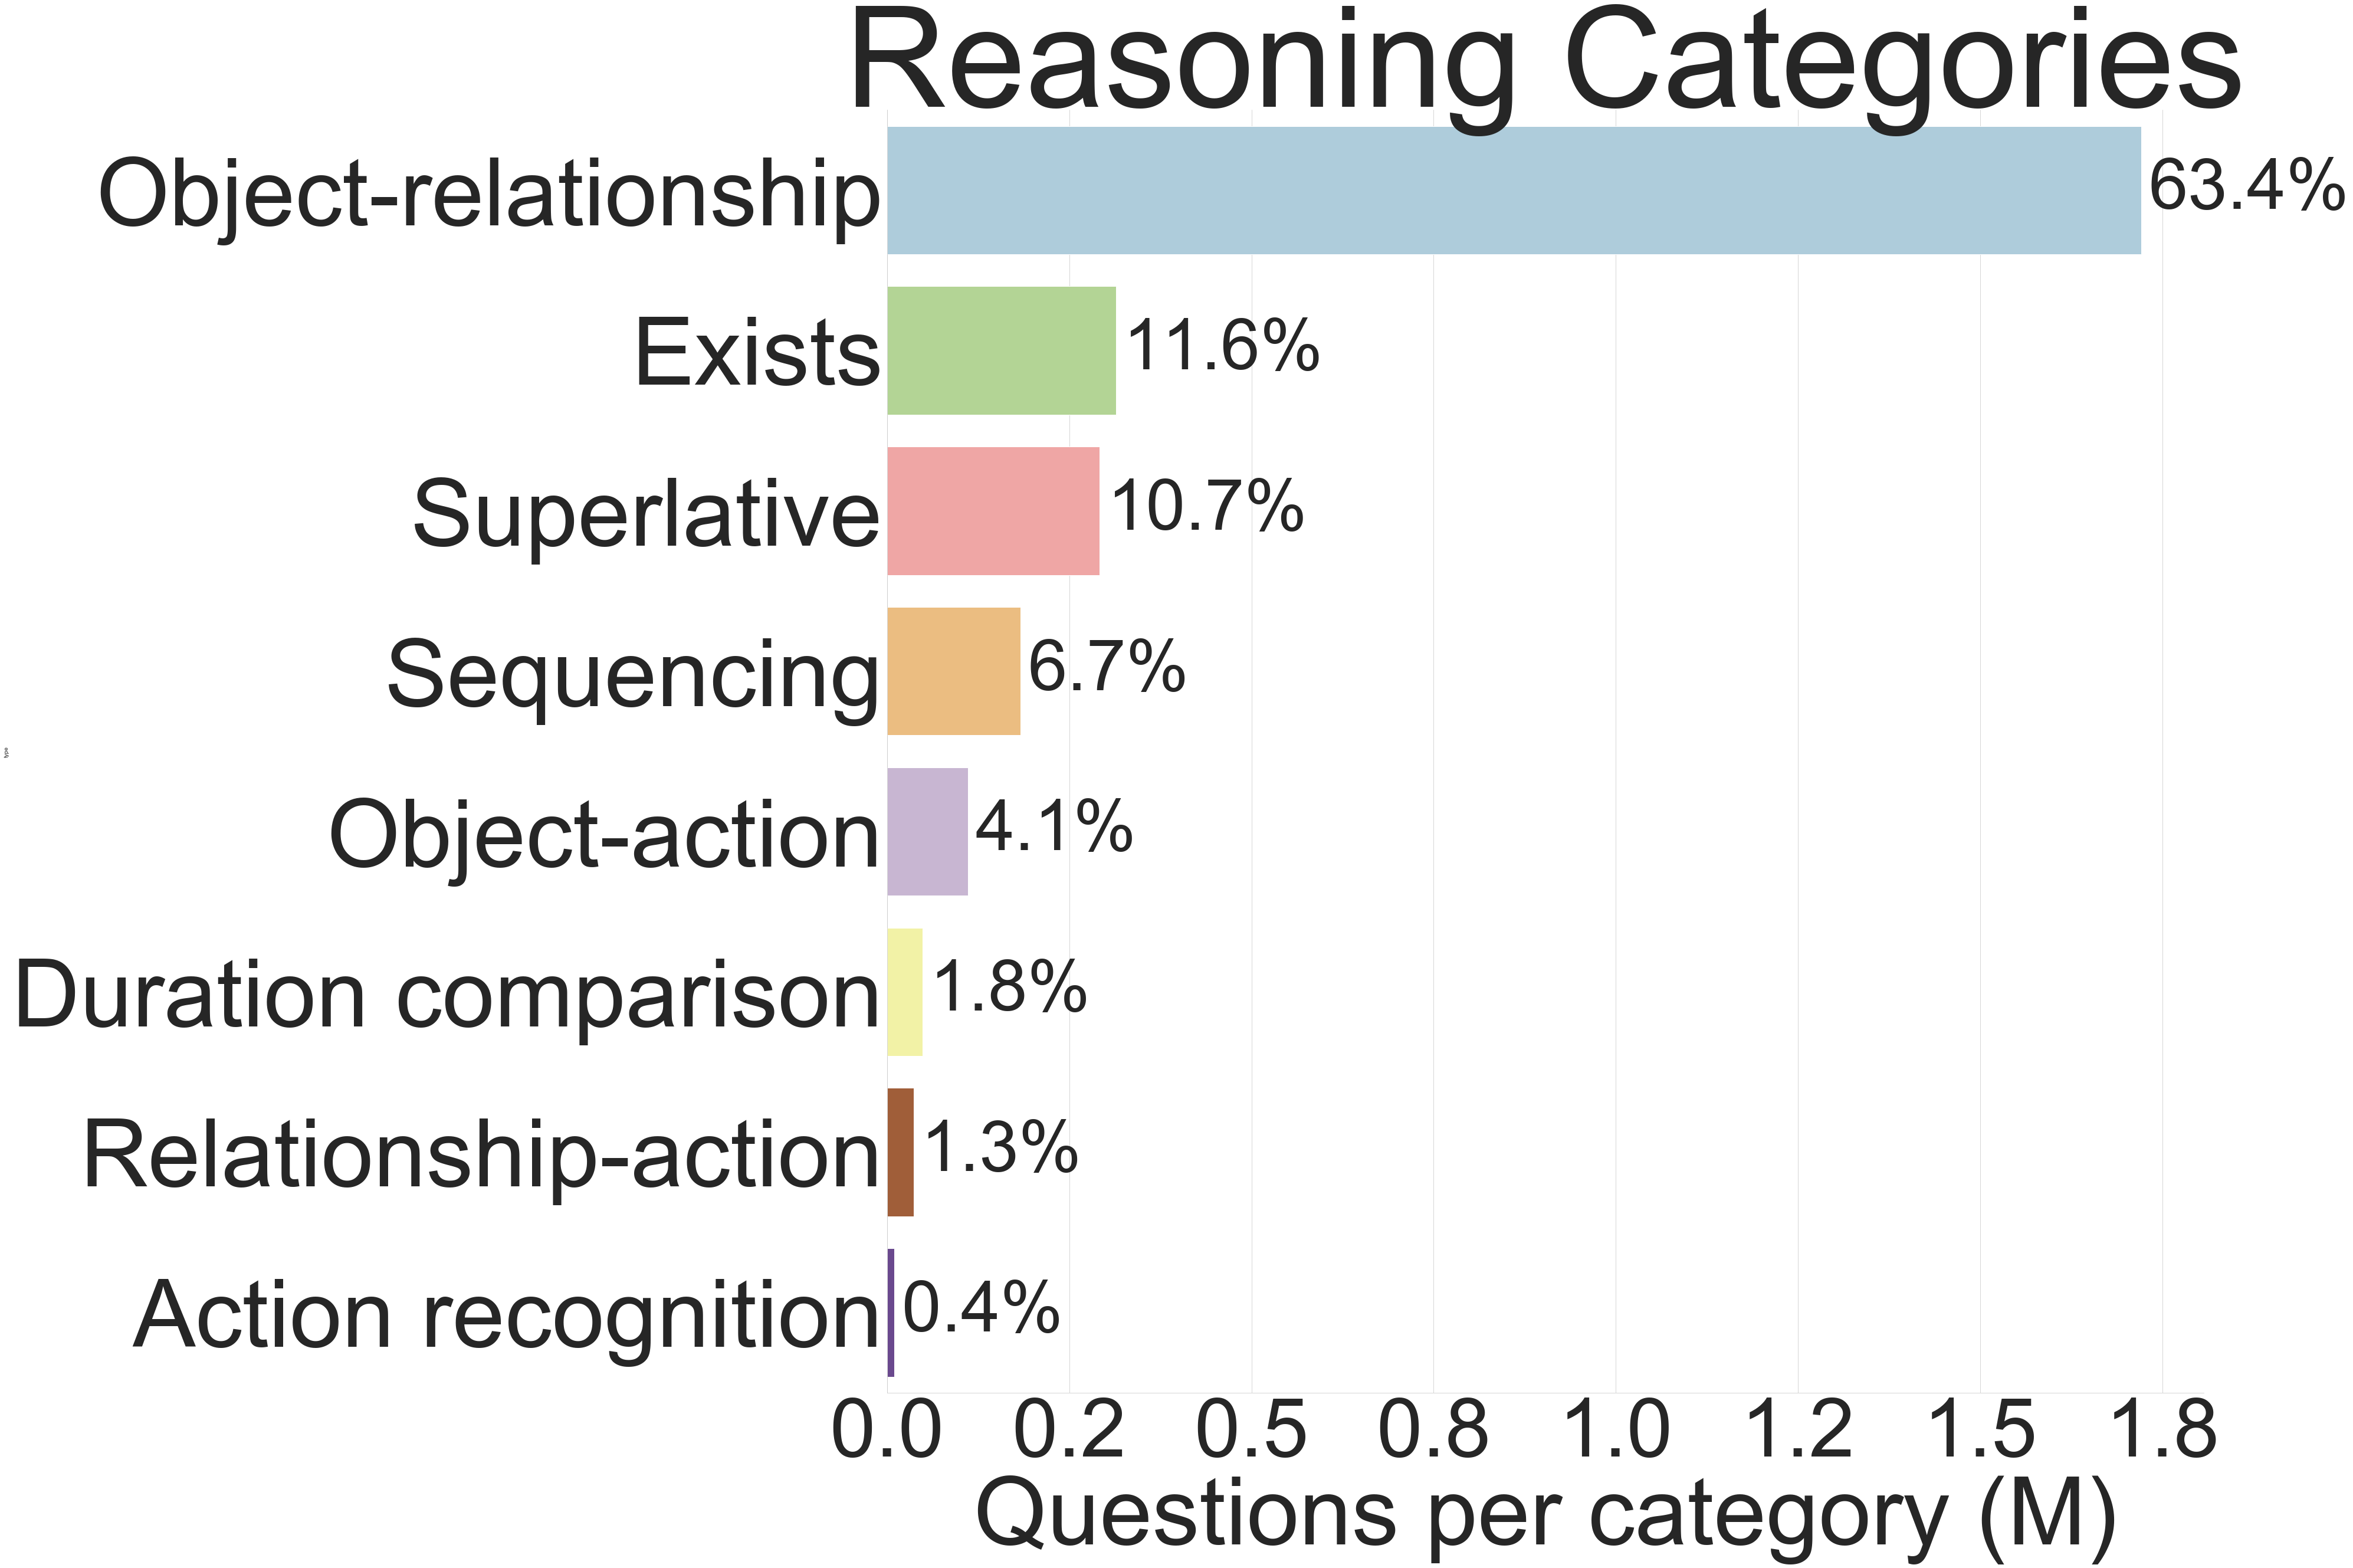

<Figure size 432x288 with 0 Axes>

In [48]:
comb = {}
for i in globs_bal:
    #print()
    
    for j in i:
        print(j, i[j])
        if j not in comb:
            comb[j] = 0
        comb[j] += i[j]
        
#comb['First and Last'] = comb['first'] + comb['last']
##del comb['first']
#del comb['last']

comb['Object-Relationship'] = comb['obj-rel']
del comb['obj-rel']
        
comb['Object-Action'] = comb['obj-act']
del comb['obj-act']

comb['Relationship-Action'] = comb['rel-act']
del comb['rel-act']

comb['Duration Comparison'] = comb['duration-comparison']
del comb['duration-comparison']

comb['Action Recognition'] = comb['action-recognition']
del comb['action-recognition']

del comb['count']

sorted_comb = {k: v for k, v in sorted(comb.items(), key=lambda item: item[1], reverse=True)}
x = list(sorted_comb.values())
labels = list(sorted_comb)
labels = [i.capitalize() for i in labels]
        


#cmaps = ["vlag", 'YlGnBu', 'Accent', 'Accen/t_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r']
cmap = 'Paired'#, 'OrRd_r']
#pieGraphVisual(x, labels, 'Reasoning Categories', cmap, color_idx=[0, 2, 4, 6, 8, 10, 11, 9, 5])
barPlotVisual(x, labels, 'Reasoning Categories', cmap, color_idx=[0, 2, 4, 6, 8, 10, 11, 9, 5])
    
    #plt.show()
    #plt.clf()

In [19]:
x = [3014864, 961649, 590348, 320393, 206110, 53199, 11648, 480]

In [20]:
s = sum(x)

In [22]:
480 / s

9.304686014339685e-05